In [5]:
import numpy as np
import pandas as pd
import pickle
import time
from KNN_Shapley import get_VN, get_true_KNN, compute_KNN_shapley, compute_KNN_Asymmetric_Shapley, KNN_LOO
from performance_plot import removing_sequential_data, adding_sequential_data, final_plot

In [6]:
# Load data
i_sample = 0
num_samples_per_class_trn, num_samples_per_class_tst = 100, 50
shift_limit_dx, shift_limit_dy, scale_limit, rotate_limit = 0.0625, 0.0625, 0.1, 45
param_setting = "num_samples_per_class_trn={}_num_samples_per_class_tst={}_shift_dx={}_shift_dy={}_scale={}_rotate={}".format(num_samples_per_class_trn, num_samples_per_class_tst, shift_limit_dx, shift_limit_dy, scale_limit, rotate_limit)

with open("data/mnist_balanced_sample 2/augmented_sample{}_".format(i_sample+1) + param_setting + ".pickle", "rb") as fp:
    mydict = pickle.load(fp)
    
X_ori = mydict['X_ori']
y_ori = mydict['y_ori'].astype('int64')
X_aug = mydict['X_aug']
y_aug = mydict['y_aug'].astype('int64')
X_ori_aug = mydict['X_ori_aug']
y_ori_aug = mydict['y_ori_aug'].astype('int64')
X_val = mydict['X_val']
y_val = mydict['y_val'].astype('int64')

s_class_dic = {0:np.asarray(range(len(X_ori))), 
               1:np.asarray(range(len(X_ori), len(X_ori_aug)))}

## Part. 1 Extreme Case

Exact replication, which means the augmentation is completely trivial and augmentation data point exactly equals the corresponding original couterpart.

1.1 Train model with $D$. Compute SV.

1.2 Train model with $D\cup D^{\prime}$. Compute SV and ASV

1.3 Train model with $D\cup D^{\prime}\cup D{\prime\prime}$. Compute SV and ASV.

1.4 Plot histograms for SV.

1.5 Plot histograms for ASV.

### 1.1

In [7]:
K = 5
directory = 'experiments/fair allocation in data market/MNIST/exact replication/'

In [11]:
X_train_1 = X_ori
y_train_1 = y_ori

# train knn classifier
X_train_knn_gt_1 = get_true_KNN(X_train_1, X_val)

100%|████████████████████████████████████████| 500/500 [00:00<00:00, 730.17it/s]


In [12]:
# Compute SV
start = time.time()
knn_shaps = compute_KNN_shapley(y_train_1, X_train_knn_gt_1, y_val, K)
end = time.time()
print("Time to compute the exact symmetric shapley values for all data:", end - start)
np.save(directory + 'single_copy_knn_sv_K={}_'.format(K) + param_setting, knn_shaps)

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1226.62it/s]

Time to compute the exact symmetric shapley values for all data: 0.4090280532836914


In [13]:
# Compute ASV
s_class_dic = {0:np.asarray(range(len(X_ori)))}

start = time.time()
knn_asym_shaps = compute_KNN_Asymmetric_Shapley(y_train_1, X_train_knn_gt_1, y_val, K, 
                                                s_class_dic)
end = time.time()
print("Time to compute the exact asymmetric shapley values for all data:", end - start)
np.save(directory + 'single_copy_knn_asv_K={}_'.format(K) + param_setting, knn_asym_shaps)

100%|████████████████████████████████████████| 500/500 [00:01<00:00, 365.55it/s]

Time to compute the exact asymmetric shapley values for all data: 1.3688299655914307


### 1.2

In [14]:
np.vstack([X_ori, X_ori]).shape, X_val.shape # Sanity check

((1000, 784), (500, 784))

In [15]:
K = 5
directory = 'experiments/fair allocation in data market/MNIST/exact replication/'
X_train_2 = np.vstack([X_ori, X_ori])
y_train_2 = np.concatenate([y_ori, y_ori])

# train knn classifier
X_train_knn_gt_2 = get_true_KNN(X_train_2, X_val)

100%|████████████████████████████████████████| 500/500 [00:01<00:00, 382.10it/s]


In [16]:
# all(y_train_2[:len(X_ori)] == y_train_2[len(X_ori):len(X_ori)*2]) # Sanity check

In [17]:
X_train_knn_gt_2.shape, y_train_2.shape # Sanity check

((500, 1000), (1000,))

In [18]:
# Compute SV
start = time.time()
knn_shaps = compute_KNN_shapley(y_train_2, X_train_knn_gt_2, y_val, K)
end = time.time()
print("Time to compute the exact symmetric shapley values for all data:", end - start)
np.save(directory + 'double_copy_knn_sv_K={}_'.format(K) + param_setting, knn_shaps)

100%|████████████████████████████████████████| 500/500 [00:00<00:00, 620.51it/s]


Time to compute the exact symmetric shapley values for all data: 0.8075070381164551


In [19]:
# Compute ASV
s_class_dic = {0:np.asarray(range(len(X_ori))), 
               1:np.asarray(range(len(X_ori), len(X_train_2)))}

start = time.time()
knn_asym_shaps = compute_KNN_Asymmetric_Shapley(y_train_2, X_train_knn_gt_2, y_val, K, 
                                                s_class_dic)
end = time.time()
print("Time to compute the exact asymmetric shapley values for all data:", end - start)
np.save(directory + 'double_copy_knn_asv_K={}_'.format(K) + param_setting, knn_asym_shaps)

100%|█████████████████████████████████████████| 500/500 [00:07<00:00, 65.00it/s]

Time to compute the exact asymmetric shapley values for all data: 9.637327909469604


### 1.3

In [20]:
# np.vstack([X_ori, X_ori, X_ori]).shape, X_val.shape

In [21]:
K = 5
directory = 'experiments/fair allocation in data market/MNIST/exact replication/'
X_train_3 = np.vstack([X_ori, X_ori, X_ori])
y_train_3 = np.concatenate([y_ori, y_ori, y_ori])

# train knn classifier
X_train_knn_gt_3 = get_true_KNN(X_train_3, X_val)

100%|████████████████████████████████████████| 500/500 [00:01<00:00, 256.16it/s]


In [22]:
# all(y_train_3[:len(X_ori)] == y_train_3[len(X_ori):len(X_ori)*2]) # Sanity check

In [23]:
# all(y_train_3[len(X_ori):len(X_ori)*2] == y_train_3[len(X_ori)*2:len(X_ori)*3]) # Sanity check

In [24]:
# Compute SV
start = time.time()
knn_shaps = compute_KNN_shapley(y_train_3, X_train_knn_gt_3, y_val, K)
end = time.time()
print("Time to compute the exact symmetric shapley values for all data:", end - start)
np.save(directory + 'triple_copy_knn_sv_K={}_'.format(K) + param_setting, knn_shaps)

100%|████████████████████████████████████████| 500/500 [00:01<00:00, 408.77it/s]

Time to compute the exact symmetric shapley values for all data: 1.2248148918151855


In [25]:
# Compute ASV
s_class_dic = {0:np.asarray(range(len(X_ori))), 
               1:np.asarray(range(len(X_ori), len(X_ori)*2)),
               2:np.asarray(range(len(X_ori)*2, len(X_ori)*3))}

# Python overflow: N_V - l -2 is too large
# s_class_dic = {0:np.asarray(range(len(X_ori))), 
#                1:np.asarray(range(len(X_ori), len(X_train_3)))}

start = time.time()
knn_asym_shaps = compute_KNN_Asymmetric_Shapley(y_train_3, X_train_knn_gt_3, y_val, K, 
                                                s_class_dic)
end = time.time()
print("Time to compute the exact asymmetric shapley values for all data:", end - start)
np.save(directory + 'triple_copy_knn_asv_K={}_'.format(K) + param_setting, knn_asym_shaps)

100%|█████████████████████████████████████████| 500/500 [00:11<00:00, 41.90it/s]

Time to compute the exact asymmetric shapley values for all data: 24.461716890335083


In [26]:
# knn_asym_shaps.max(), knn_asym_shaps.min() # Sanity check

### 1.4

In [8]:
# Load SV and ASV
single_copy_sv = np.load(directory + 'single_copy_knn_sv_K={}_'.format(K) + param_setting + '.npy')
double_copy_sv = np.load(directory + 'double_copy_knn_sv_K={}_'.format(K) + param_setting + '.npy')
triple_copy_sv = np.load(directory + 'triple_copy_knn_sv_K={}_'.format(K) + param_setting + '.npy')

single_copy_asv = np.load(directory + 'single_copy_knn_asv_K={}_'.format(K) + param_setting + '.npy')
double_copy_asv = np.load(directory + 'double_copy_knn_asv_K={}_'.format(K) + param_setting + '.npy')
triple_copy_asv = np.load(directory + 'triple_copy_knn_asv_K={}_'.format(K) + param_setting + '.npy')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig_directory = 'experiments/fair allocation in data market/MNIST/exact replication/figures/'

In [15]:
len(single_copy_sv), len(double_copy_sv), len(triple_copy_sv)

(500, 1000, 1500)

In [10]:
g = [i for i in range(len(single_copy_sv))]

# rank sv from high to low
single_copy_sv_idx = np.argsort(single_copy_sv)[::-1] 
single_copy_high_sv = single_copy_sv[single_copy_sv_idx]

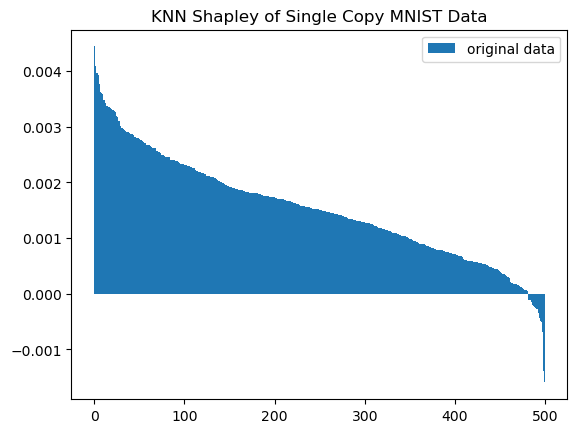

In [12]:
plt.bar(g, single_copy_high_sv, label='original data', width=1.0)
plt.title('KNN Shapley of Single Copy MNIST Data')
plt.legend()
plt.show()

In [17]:
len(double_copy_sv)

1000

In [19]:
# Sanity check: efficiency axiom 

sum(single_copy_sv), sum(double_copy_sv), sum(triple_copy_sv)

(0.7632000000000005, 0.8199999999999995, 0.8387999999999997)

In [20]:
# Sanity check

single_copy_sv[0], double_copy_sv[0], triple_copy_sv[0]

(0.0013279442689683283, 0.0006639721344841641, 0.0004426480896561096)

In [21]:
# Sanity check

single_copy_sv[1], double_copy_sv[1], triple_copy_sv[1]

(0.0009202007031149693, 0.00044343368489081704, 0.000295622456593879)

In [22]:
g = [i for i in range(len(single_copy_sv))]

# rank sv from high to low
first_copy_sv_idx = np.argsort(double_copy_sv[:len(X_ori)])[::-1] 
second_copy_sv_idx = first_copy_sv_idx + len(X_ori)

first_copy_high_sv = double_copy_sv[first_copy_sv_idx]
second_copy_high_sv = double_copy_sv[second_copy_sv_idx]

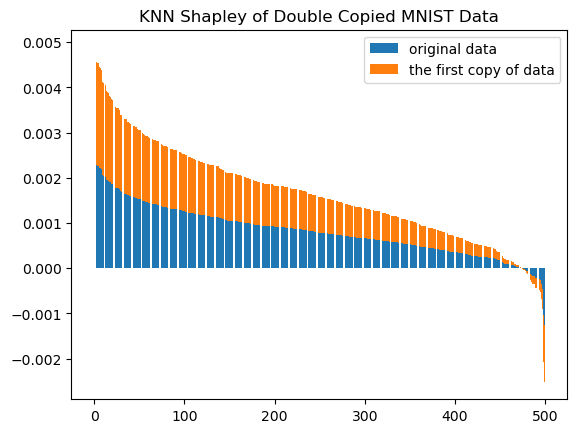

In [23]:
plt.bar(g, first_copy_high_sv, label='original data')
plt.bar(g, second_copy_high_sv, bottom=first_copy_high_sv, label='the first copy of data')
plt.title('KNN Shapley of Double Copied MNIST Data')
plt.legend()
plt.show()

In [38]:
# round(first_copy_high_sv[0], 5) # Sanity check

In [24]:
# Sanity check: verify the symmetry axiom
for i in range(len(first_copy_high_sv)):
    if first_copy_high_sv[i] != second_copy_high_sv[i]:
        if round(first_copy_high_sv[i], 5) != round(second_copy_high_sv[i], 5):
            print('Error')
            print(i, first_copy_high_sv[i], second_copy_high_sv[i])

In [25]:
g = [i for i in range(len(single_copy_sv))]

# rank sv from high to low
first_copy_sv_idx = np.argsort(triple_copy_sv[:len(X_ori)])[::-1] 
second_copy_sv_idx = first_copy_sv_idx + len(X_ori)
third_copy_sv_idx = first_copy_sv_idx + 2*len(X_ori)

first_copy_high_sv = triple_copy_sv[first_copy_sv_idx]
second_copy_high_sv = triple_copy_sv[second_copy_sv_idx]
third_copy_high_sv = triple_copy_sv[third_copy_sv_idx]

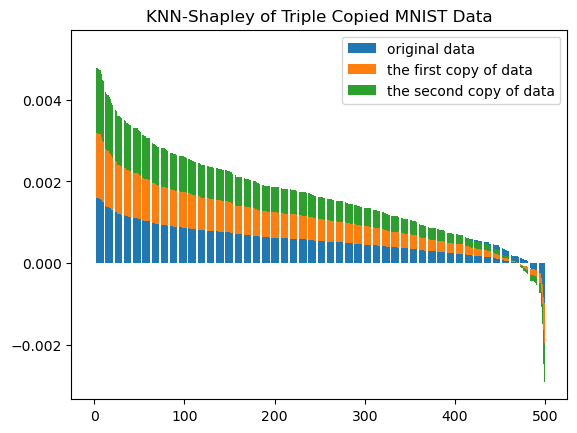

In [26]:
plt.bar(g, single_copy_high_sv, label='original data')
plt.bar(g, second_copy_high_sv, bottom=first_copy_high_sv, label='the first copy of data')
plt.bar(g, third_copy_high_sv, bottom=first_copy_high_sv+second_copy_high_sv, 
        label='the second copy of data')
plt.title('KNN-Shapley of Triple Copied MNIST Data')
plt.legend()
plt.show()

### Concatenate three plots

In [27]:
import matplotlib.pyplot as plt

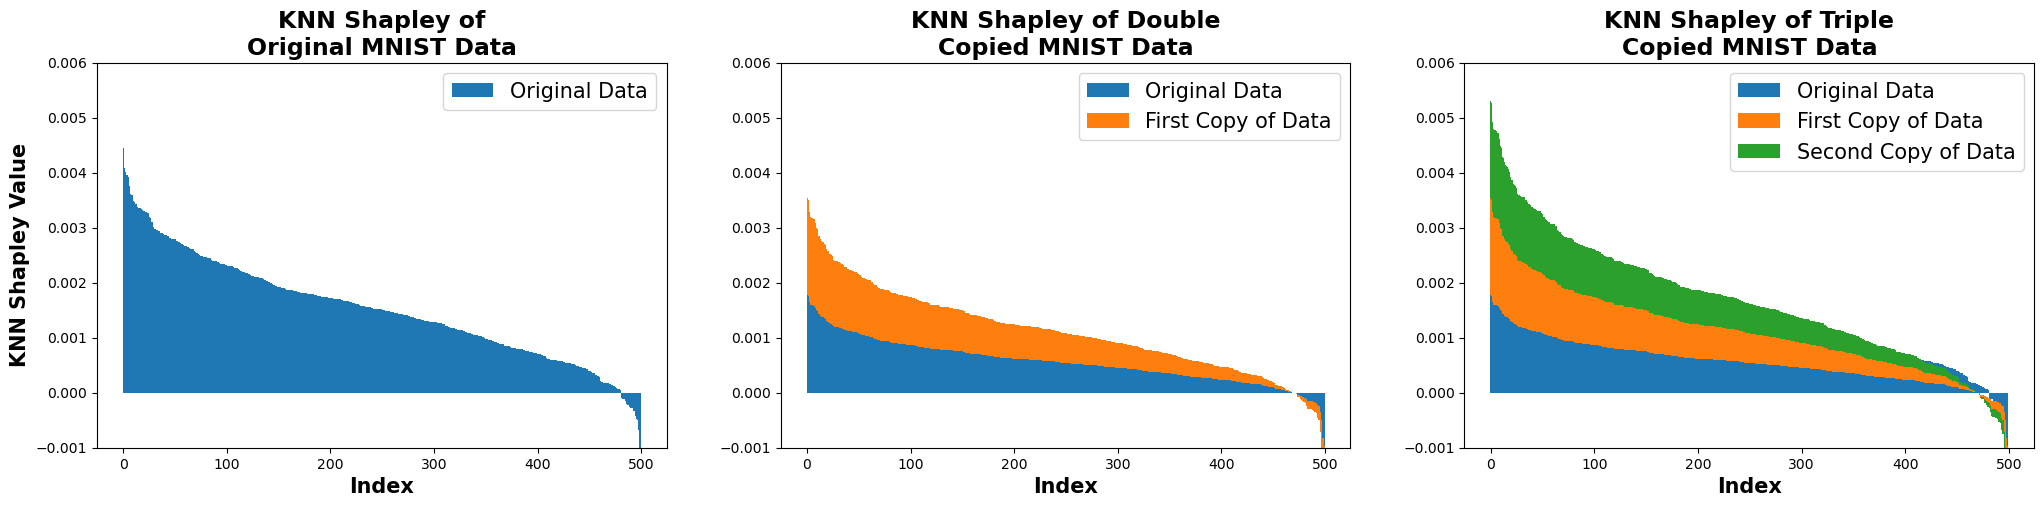

In [28]:
# Define the canvas
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

# Set ylim across all figures
ylim = (-0.001, 0.006)

# Define colors for bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

title_font = 17
label_font = 15
legend_font = 15

# First subplot
axs[0].bar(g, single_copy_high_sv, color=colors[0], label='Original Data', width=1.0)
axs[0].set_title('KNN Shapley of\nOriginal MNIST Data', fontsize=title_font, fontweight='bold')
axs[0].legend(fontsize=legend_font)
axs[0].set_ylim(ylim)
axs[0].set_xlabel('Index', fontsize=label_font, fontweight='bold')
axs[0].set_ylabel('KNN Shapley Value', fontsize=label_font, fontweight='bold')

# Second subplot
axs[1].bar(g, first_copy_high_sv, color=colors[0], label='Original Data', width=1.0)
axs[1].bar(g, second_copy_high_sv, bottom=first_copy_high_sv, 
           color=colors[1], label='First Copy of Data', width=1.0)
axs[1].set_title('KNN Shapley of Double\nCopied MNIST Data', fontsize=title_font, fontweight='bold')
axs[1].legend(fontsize=legend_font)
axs[1].set_ylim(ylim)
axs[1].set_xlabel('Index', fontsize=label_font, fontweight='bold')

# Third subplot
axs[2].bar(g, single_copy_high_sv, color=colors[0], label='Original Data', width=1.0)
axs[2].bar(g, second_copy_high_sv, bottom=first_copy_high_sv, 
           color=colors[1], label='First Copy of Data', width=1.0)
axs[2].bar(g, third_copy_high_sv, bottom=first_copy_high_sv + second_copy_high_sv, 
           color=colors[2], label='Second Copy of Data', width=1.0)
axs[2].set_title('KNN Shapley of Triple\nCopied MNIST Data', fontsize=title_font, fontweight='bold')
axs[2].legend(fontsize=legend_font)
axs[2].set_ylim(ylim)
axs[2].set_xlabel('Index', fontsize=label_font, fontweight='bold')

# Adjust layout and save the figure
plt.savefig(fig_directory + 'sv_exact_replications_' + param_setting + '.png', dpi=500,
           bbox_inches='tight')
plt.show()

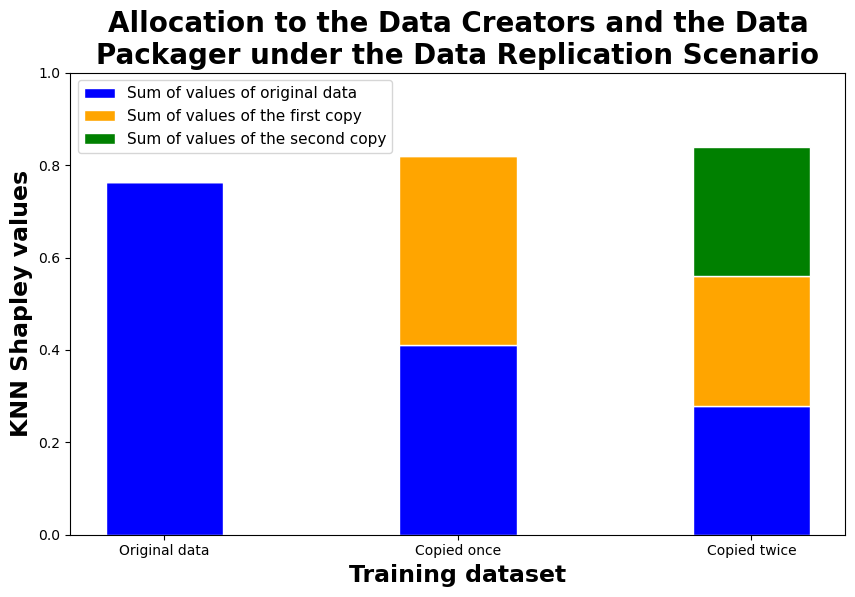

In [29]:
title_font = 20
label_font = 17
legend_font = 11

categories = ['Original data', 'Copied once', 'Copied twice']
bar_width = 0.4

# Heights of the bars
first_copy_svs = [sum(single_copy_sv), sum(double_copy_sv[first_copy_sv_idx]), sum(triple_copy_sv[first_copy_sv_idx])]
second_copy_svs = [0, sum(double_copy_sv[second_copy_sv_idx]), sum(triple_copy_sv[second_copy_sv_idx])]
third_copy_svs = [0, 0, sum(triple_copy_sv[third_copy_sv_idx])]

# Positions of the bars on the x-axis
r = np.arange(len(categories))

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(r, first_copy_svs, color='b', edgecolor='white', width=bar_width, 
        label='Sum of values of original data')
plt.bar(r, second_copy_svs, bottom=first_copy_svs, color='orange', edgecolor='white', width=bar_width, 
        label='Sum of values of the first copy')
plt.bar(r, third_copy_svs, bottom=[i+j for i,j in zip(first_copy_svs, second_copy_svs)], 
        color='g', edgecolor='white', width=bar_width, label='Sum of values of the second copy')

# Add labels and title
plt.xlabel('Training dataset', fontweight='bold', fontsize=label_font)
plt.ylabel('KNN Shapley values', fontweight='bold', fontsize=label_font)
plt.ylim((0, 1))
plt.xticks(r, categories)
plt.title('Allocation to the Data Creators and the Data\nPackager under the Data Replication Scenario', 
          fontweight='bold', fontsize=title_font)

# Add a legend
plt.legend(loc='upper left', fontsize=legend_font)

# Save figure
plt.savefig(fig_directory + 'barplot_sv_exact_replications_' + param_setting + '.png', dpi=500,
           bbox_inches='tight')

# Display the plot
plt.show()

### 1.5

In [55]:
# Load SV and ASV
single_copy_sv = np.load(directory + 'single_copy_knn_sv_K={}_'.format(K) + param_setting + '.npy')
double_copy_sv = np.load(directory + 'double_copy_knn_sv_K={}_'.format(K) + param_setting + '.npy')
triple_copy_sv = np.load(directory + 'triple_copy_knn_sv_K={}_'.format(K) + param_setting + '.npy')

single_copy_asv = np.load(directory + 'single_copy_knn_asv_K={}_'.format(K) + param_setting + '.npy')
double_copy_asv = np.load(directory + 'double_copy_knn_asv_K={}_'.format(K) + param_setting + '.npy')
triple_copy_asv = np.load(directory + 'triple_copy_knn_asv_K={}_'.format(K) + param_setting + '.npy')

In [37]:
# Sanity check: efficiency axiom of sv

# sum(single_copy_sv), sum(double_copy_sv), sum(triple_copy_asv)

In [38]:
# Sanity check: efficiency axiom of asv

# sum(single_copy_asv), sum(double_copy_asv), sum(triple_copy_asv)

In [39]:
# Sanity check: efficiency axiom of asv

# sum(double_copy_asv[len(X_ori):]), sum(double_copy_asv) - sum(single_copy_asv)

In [40]:
# Sanity check: efficiency axiom of asv

# sum(triple_copy_asv[len(X_ori):len(X_ori)*2]), sum(double_copy_asv) - sum(single_copy_asv)

In [41]:
# Sanity check: efficiency axiom of asv

# sum(triple_copy_asv[len(X_ori)*2:len(X_ori)*3]), sum(triple_copy_asv) - sum(double_copy_asv)

In [42]:
# Sanity check

# double_copy_asv[len(single_copy_asv):len(single_copy_asv)+20]

In [43]:
# triple_copy_asv[len(single_copy_asv)*2:len(single_copy_asv)*2+20]

In [56]:
g = [i for i in range(len(single_copy_sv))]

# rank asv from high to low
single_copy_asv_idx = np.argsort(single_copy_asv)[::-1] 
single_copy_high_asv = single_copy_asv[single_copy_asv_idx]

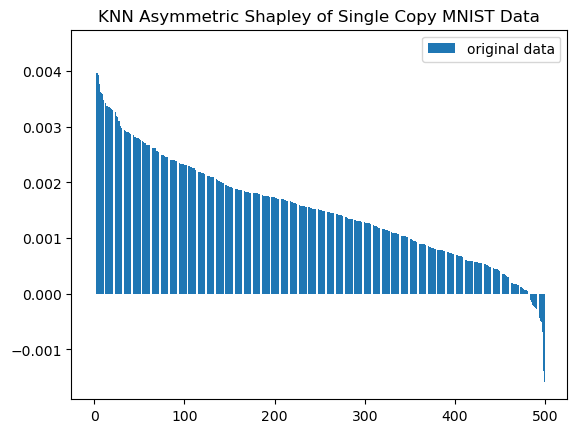

In [57]:
plt.bar(g, single_copy_high_asv, label='original data')
plt.title('KNN Asymmetric Shapley of Single Copy MNIST Data')
plt.legend()
plt.show()

In [58]:
g = [i for i in range(len(single_copy_asv))]

# rank asv from high to low
first_copy_asv_idx = np.argsort(double_copy_asv[:len(X_ori)])[::-1] 
second_copy_asv_idx = first_copy_asv_idx + len(X_ori)

first_copy_high_asv = double_copy_asv[first_copy_asv_idx]
second_copy_high_asv = double_copy_asv[second_copy_asv_idx]

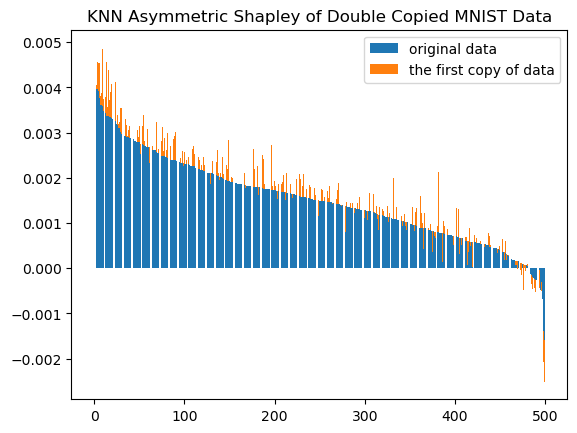

In [59]:
plt.bar(g, first_copy_high_asv, label='original data')
plt.bar(g, second_copy_high_asv, bottom=first_copy_high_asv, label='the first copy of data')
plt.title('KNN Asymmetric Shapley of Double Copied MNIST Data')
plt.legend()
plt.show()

In [60]:
g = [i for i in range(len(single_copy_asv))]

# rank asv from high to low
first_copy_asv_idx = np.argsort(triple_copy_asv[:len(X_ori)])[::-1] 
second_copy_asv_idx = first_copy_asv_idx + len(X_ori)
third_copy_asv_idx = first_copy_asv_idx + 2*len(X_ori)

first_copy_high_asv = triple_copy_asv[first_copy_asv_idx]
second_copy_high_asv = triple_copy_asv[second_copy_asv_idx]
third_copy_high_asv = triple_copy_asv[third_copy_asv_idx]

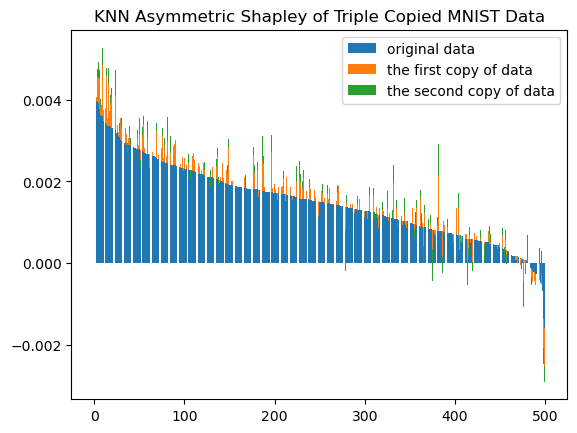

In [61]:
plt.bar(g, first_copy_high_asv, label='original data')
plt.bar(g, second_copy_high_asv, bottom=first_copy_high_asv, label='the first copy of data')
plt.bar(g, third_copy_high_asv, bottom=first_copy_high_asv + second_copy_high_asv, label='the second copy of data')
plt.title('KNN Asymmetric Shapley of Triple Copied MNIST Data')
plt.legend()
plt.show()

### Concatenate three plots

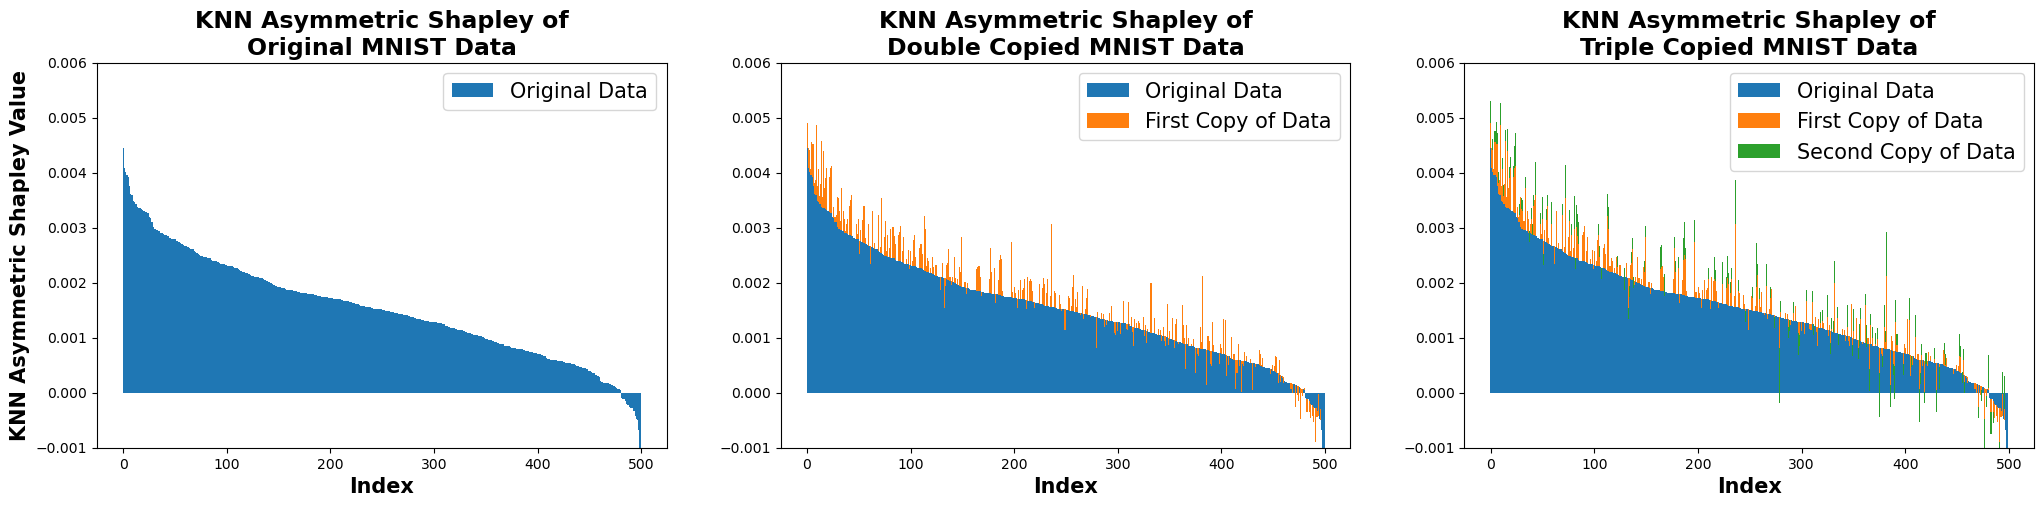

In [80]:
# Define the canvas
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

# Set ylim across all figures
ylim = (-0.001, 0.006)

# Define colors for bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

title_font = 17
label_font = 15
legend_font = 15

# First subplot
axs[0].bar(g, single_copy_high_asv, color=colors[0], label='Original Data', width=1.0)
axs[0].set_title('KNN Asymmetric Shapley of\nOriginal MNIST Data', fontsize=title_font, fontweight='bold')
axs[0].legend(fontsize=legend_font)
axs[0].set_ylim(ylim)
axs[0].set_xlabel('Index', fontsize=label_font, fontweight='bold')
axs[0].set_ylabel('KNN Asymmetric Shapley Value', fontsize=label_font, fontweight='bold')

# Second subplot
axs[1].bar(g, first_copy_high_asv, color=colors[0], label='Original Data', width=1.0)
axs[1].bar(g, second_copy_high_asv, bottom=first_copy_high_asv, 
           color=colors[1], label='First Copy of Data', width=1.0)
axs[1].set_title('KNN Asymmetric Shapley of\nDouble Copied MNIST Data', fontsize=title_font, fontweight='bold')
axs[1].legend(fontsize=legend_font)
axs[1].set_ylim(ylim)
axs[1].set_xlabel('Index', fontsize=label_font, fontweight='bold')

# Third subplot
axs[2].bar(g, single_copy_high_asv, color=colors[0], label='Original Data', width=1.0)
axs[2].bar(g, second_copy_high_asv, bottom=first_copy_high_asv, 
           color=colors[1], label='First Copy of Data', width=1.0)
axs[2].bar(g, third_copy_high_asv, bottom=first_copy_high_asv + second_copy_high_asv, 
           color=colors[2], label='Second Copy of Data', width=1.0)
axs[2].set_title('KNN Asymmetric Shapley of\nTriple Copied MNIST Data', fontsize=title_font, fontweight='bold')
axs[2].legend(fontsize=legend_font)
axs[2].set_ylim(ylim)
axs[2].set_xlabel('Index', fontsize=label_font, fontweight='bold')

# Adjust layout and save the figure
plt.savefig(fig_directory + 'asv_exact_replications_' + param_setting + '.png', dpi=500,
           bbox_inches='tight')
plt.show()

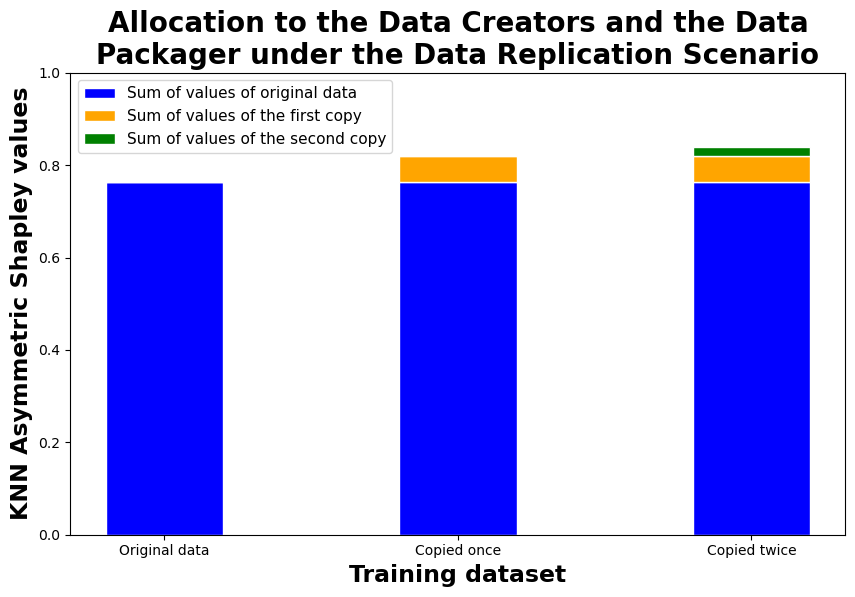

In [86]:
title_font = 20
label_font = 17
legend_font = 11

categories = ['Original data', 'Copied once', 'Copied twice']
bar_width = 0.4

# Heights of the bars
first_copy_asvs = [sum(single_copy_asv), sum(double_copy_asv[first_copy_asv_idx]), sum(triple_copy_asv[first_copy_asv_idx])]
second_copy_asvs = [0, sum(double_copy_asv[second_copy_asv_idx]), sum(triple_copy_asv[second_copy_asv_idx])]
third_copy_asvs = [0, 0, sum(triple_copy_asv[third_copy_asv_idx])]

# Positions of the bars on the x-axis
r = np.arange(len(categories))

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(r, first_copy_asvs, color='b', edgecolor='white', width=bar_width, 
        label='Sum of values of original data')
plt.bar(r, second_copy_asvs, bottom=first_copy_asvs, color='orange', edgecolor='white', width=bar_width, 
        label='Sum of values of the first copy')
plt.bar(r, third_copy_asvs, bottom=[i+j for i,j in zip(first_copy_asvs, second_copy_asvs)], 
        color='g', edgecolor='white', width=bar_width, label='Sum of values of the second copy')

# Add labels and title
plt.xlabel('Training dataset', fontweight='bold', fontsize=label_font)
plt.ylabel('KNN Asymmetric Shapley values', fontweight='bold', fontsize=label_font)
plt.ylim((0, 1))
plt.xticks(r, categories)
plt.title('Allocation to the Data Creators and the Data\nPackager under the Data Replication Scenario', 
          fontweight='bold', fontsize=title_font)

# Add a legend
plt.legend(loc='upper left', fontsize=legend_font)

# Save figure
plt.savefig(fig_directory + 'barplot_asv_exact_replications_' + param_setting + '.png', dpi=500,
           bbox_inches='tight')

# Display the plot
plt.show()


In [52]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the canvas
# fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# categories = ['Original data', 'Copied once', 'Copied twice']
# bar_width = 0.4

# # Heights of the bars in the first plot
# first_copy_svs = [sum(single_copy_sv), sum(double_copy_sv[first_copy_sv_idx]), sum(triple_copy_sv[first_copy_sv_idx])]
# second_copy_svs = [0, sum(double_copy_sv[second_copy_sv_idx]), sum(triple_copy_sv[second_copy_sv_idx])]
# third_copy_svs = [0, 0, sum(triple_copy_sv[third_copy_sv_idx])]

# # Positions of the bars on the x-axis
# r = np.arange(len(categories))

# # Create the stacked bar plot for the first subplot
# axs[0].bar(r, first_copy_svs, color='b', edgecolor='white', width=bar_width, 
#         label='Sum of values of original data (allocated to data creators)')
# axs[0].bar(r, second_copy_svs, bottom=first_copy_svs, color='orange', edgecolor='white', width=bar_width, 
#         label='Sum of values of the first copy (allocated to the data packager)')
# axs[0].bar(r, third_copy_svs, bottom=[i+j for i,j in zip(first_copy_svs, second_copy_svs)], 
#         color='g', edgecolor='white', width=bar_width, 
#            label='Sum of values of the second copy (allocated to the data packager)')

# # Add labels, and legend for the first subplot
# axs[0].set_xlabel('Training dataset', fontweight='bold')
# axs[0].set_ylabel('KNN Shapley values', fontweight='bold')
# axs[0].set_ylim((0, 1))
# axs[0].set_xticks(r, categories)
# axs[0].legend()

# # Heights of the bars in the second plot
# first_copy_asvs = [sum(single_copy_asv), sum(double_copy_asv[first_copy_asv_idx]), 
#                    sum(triple_copy_asv[first_copy_asv_idx])]
# second_copy_asvs = [0, sum(double_copy_asv[second_copy_asv_idx]), sum(triple_copy_asv[second_copy_asv_idx])]
# third_copy_asvs = [0, 0, sum(triple_copy_asv[third_copy_asv_idx])]

# # Create the stacked bar plot for the second subplot
# axs[1].bar(r, first_copy_asvs, color='b', edgecolor='white', width=bar_width, 
#         label='Sum of values of original data')
# axs[1].bar(r, second_copy_asvs, bottom=first_copy_asvs, color='orange', edgecolor='white', width=bar_width, 
#         label='Sum of values of the first copy')
# axs[1].bar(r, third_copy_asvs, bottom=[i+j for i,j in zip(first_copy_asvs, second_copy_asvs)], 
#         color='g', edgecolor='white', width=bar_width, label='Sum of values of the second copy')

# # Add labels, and legend for the second subplot
# axs[1].set_xlabel('Training dataset', fontweight='bold')
# axs[1].set_ylabel('KNN Asymmetric Shapley values', fontweight='bold')
# axs[1].set_ylim((0, 1))
# axs[1].set_xticks(r, categories)

# # Add a single overarching title for the entire figure
# fig.suptitle('Allocation of Values to Data Creators and the Data Packager under the Data Replication Scenario', 
#              fontweight='bold', fontsize = 15)

# # Save figure
# plt.savefig(fig_directory + 'barplot_exact_replications_' + param_setting + '.png')

# # Display the plot
# plt.show()

## 2. Load TMC (Asymmetric) Shapley Data

In [53]:
# # Load the symmetric shap values, asymmetric shap values, and loo values
# directory = 'experiments/augmented data valuation/MNIST/'
# num_permutations = 2500

# with open(directory + 'tmc_shapley_model=KNN_metric=accuracy.pkl', 'rb') as fp:
#     mc_shap = pickle.load(fp)

# mc_shap_marginals = mc_shap['marginals_tmc'][:num_permutations]
# mc_shap_vals = np.mean(mc_shap_marginals, axis=0)

# with open(directory + 'tmc_asymmetric_shapley_model=KNN_metric=accuracy.pkl', 'rb') as fp:
#     mc_asym_shap = pickle.load(fp)

# mc_asym_shap_marginals = mc_asym_shap['marginals_tmc'][:num_permutations]
# mc_asym_shap_vals = np.mean(mc_asym_shap_marginals, axis=0)

# print('mc_shap_vals.shape', mc_shap_vals.shape, 'mc_shap_marginals.shape', mc_shap_marginals.shape)
# print('mc_asym_shap_vals.shape', mc_asym_shap_vals.shape, 'mc_asym_shap_marginals.shape',
#       mc_asym_shap_marginals.shape)

In [54]:
# mc_shap_vals_ori = mc_shap_vals[s_class_dic[0]]
# mc_shap_vals_aug = mc_shap_vals[s_class_dic[1]]
# print(mc_shap_vals_ori.shape, mc_shap_vals_aug.shape)

In [55]:
# mc_asym_shap_vals_ori = mc_asym_shap_vals[s_class_dic[0]]
# mc_asym_shap_vals_aug = mc_asym_shap_vals[s_class_dic[1]]
# print(mc_asym_shap_vals_ori.shape, mc_asym_shap_vals_aug.shape)

## Realistic Case

### We have 1000 data creators/contributors and one data packager. If distribute values using asymmetric data shapley, then:

In [56]:
# import matplotlib.pyplot as plt
# import seaborn as sns

In [57]:
# g = [i for i in range(len(mc_shap_vals_ori))]

# # rank from high to low
# ori_high_asv_idx = np.argsort(mc_asym_shap_vals_ori)[::-1] 
# aug_high_asv_idx = ori_high_asv_idx

# ori_high_asv = mc_asym_shap_vals_ori[ori_high_asv_idx]
# aug_high_asv = mc_asym_shap_vals_aug[aug_high_asv_idx]

In [58]:
# plt.bar(g, ori_high_asv, label='original data')
# plt.legend()
# plt.show()

In [59]:
# plt.bar(g, aug_high_asv, label='augmented data')
# plt.legend()
# plt.show()

In [60]:
# aug_high_asv[:len(aug_high_asv)//4].sum()

In [61]:
# aug_high_asv_pos = [max(i, 0) for i in aug_high_asv]

# plt.bar(g, ori_high_asv, label='original data')
# plt.bar(g, aug_high_asv_pos, bottom=ori_high_asv, label='augmented data')
# plt.legend()
# plt.show()

In [62]:
# sum(aug_high_asv_pos)

### We have 1000 data creators/contributors and one data packager. If distribute values using symmetric data shapley, then:

In [63]:
# g = [i for i in range(len(mc_shap_vals_ori))]

# # rank from high to low
# ori_high_sv_idx = np.argsort(mc_shap_vals_ori)[::-1] 
# aug_high_sv_idx = ori_high_sv_idx

# ori_high_sv = mc_shap_vals_ori[ori_high_sv_idx]
# aug_high_sv = mc_shap_vals_aug[aug_high_sv_idx]

In [64]:
# plt.bar(g, ori_high_sv, label='original data')
# plt.legend()
# plt.show()

In [65]:
# plt.bar(g, aug_high_sv, label='augmented data')
# plt.legend()
# plt.show()

In [66]:
# aug_high_sv_pos = [max(i, 0) for i in aug_high_sv]

# plt.bar(g, ori_high_sv, label='original data')
# plt.bar(g, aug_high_sv_pos, bottom=ori_high_sv, label='augmented data')
# plt.legend()
# plt.show()

## 3. Concatenate two plots

In [67]:
# # Plot
# fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# # First subplot
# axs[0].bar(g, ori_high_sv, label='original data')
# axs[0].bar(g, aug_high_sv_pos, bottom=ori_high_sv, 
#            label='augmented data')
# axs[0].set_xlabel('Index')
# axs[0].set_ylabel('Value')
# axs[0].set_title('Stacked Bar Plot of Original and Augmented Shapley Value')
# axs[0].legend()


# # Second subplot
# axs[1].bar(g, ori_high_asv, label='original data')
# axs[1].bar(g, aug_high_asv_pos, bottom=ori_high_asv, 
#            label='augmented data')
# axs[1].set_xlabel('Index')
# axs[1].set_ylabel('Asymmetric Shapley Value')
# axs[1].set_title('Stacked Bar Plot of Original and Augmented Asymmetric Shapley Value')
# axs[1].legend()


# plt.show()

### Adding the top 10 percent of high-value augmented data points into training set.

### ASV

In [68]:
# g = [i for i in range(len(mc_shap_vals_ori))]

# # rank from high to low
# ori_high_asv_idx = np.argsort(mc_asym_shap_vals_ori)[::-1] 
# aug_high_asv_idx = ori_high_asv_idx

# ori_high_asv = mc_asym_shap_vals_ori[ori_high_asv_idx]
# aug_high_asv = mc_asym_shap_vals_aug[aug_high_asv_idx]

In [69]:
# # Compute the 90% quantile
# asv_quantile_90 = np.quantile(aug_high_asv, 0.90)
# asv_quantile_90

In [70]:
# aug_high_asv_quantile = [i if i >= asv_quantile_90 else 0 for i in aug_high_asv]

# plt.bar(g, ori_high_asv, label='original data')
# plt.bar(g, aug_high_asv_quantile, bottom=ori_high_asv, label='augmented data')
# plt.legend()
# plt.show()

### SV

In [71]:
# g = [i for i in range(len(mc_shap_vals_ori))]

# # rank from high to low
# ori_high_sv_idx = np.argsort(mc_shap_vals_ori)[::-1] 
# aug_high_sv_idx = ori_high_sv_idx

# ori_high_sv = mc_shap_vals_ori[ori_high_sv_idx]
# aug_high_sv = mc_shap_vals_aug[aug_high_sv_idx]

In [72]:
# # Compute the 90% quantile
# sv_quantile_90 = np.quantile(aug_high_sv, 0.90)
# sv_quantile_90

In [73]:
# aug_high_sv_quantile = [i if i >= sv_quantile_90 else 0 for i in aug_high_sv]

# plt.bar(g, ori_high_sv, label='original data')
# plt.bar(g, aug_high_sv_quantile, bottom=ori_high_sv, label='augmented data')
# plt.legend()
# plt.show()

### Concatenate two plots

In [74]:
# # Plot
# fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# # First subplot
# axs[0].bar(g, ori_high_sv, label='original data')
# axs[0].bar(g, aug_high_sv_quantile, bottom=ori_high_sv, 
#            label='augmented data')
# axs[0].set_xlabel('Index')
# axs[0].set_ylabel('Value')
# axs[0].set_title('Stacked Bar Plot of Shapley Value')
# axs[0].legend()


# # Second subplot
# axs[1].bar(g, ori_high_asv, label='original data')
# axs[1].bar(g, aug_high_asv_quantile, bottom=ori_high_asv, 
#            label='augmented data')
# axs[1].set_xlabel('Index')
# axs[1].set_ylabel('Asymmetric Shapley Value')
# axs[1].set_title('Stacked Bar Plot of Asymmetric Shapley Value')
# axs[1].legend()


# plt.show()

## Extreme Case: Direct Data Replication

In [75]:
# # Plot
# fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# # First subplot
# axs[0].bar(g, ori_high_sv, label='original data')
# axs[0].bar(g, ori_high_sv, bottom=ori_high_sv, 
#            label='augmented data')
# axs[0].set_xlabel('Index')
# axs[0].set_ylabel('Value')
# axs[0].set_title('Stacked Bar Plot of Shapley Value')
# axs[0].legend()


# # Second subplot
# axs[1].bar(g, ori_high_asv, label='original data')
# axs[1].set_xlabel('Index')
# axs[1].set_ylabel('Asymmetric Shapley Value')
# axs[1].set_title('Stacked Bar Plot of Asymmetric Shapley Value')
# axs[1].legend()


# plt.show()